# TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE


<table>
  <tr><td>
    <img src="https://drive.google.com/uc?id=11BquVVgQTebvVO5NZ2TGA526rulbWBv5"
         alt="Fashion MNIST sprite"  width="1000">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1. Analyzing Customer Sentiment
  </td></tr>
</table>


![alt text](https://drive.google.com/uc?id=1HfZvPCWAwKoYl1qogYlxD_CIZYxYw0aI)

![alt text](https://drive.google.com/uc?id=1XGc89Cxi0ooFQIc6o041cz8-qwXg7l3g)

Task: predict if the customer is happy or not happy about the product.

Context: https://www.kaggle.com/datasets/mohitdulani/amazonreviewdataset

- Rating: customer rating from 1 to 5
- F eedback (Label): 1 = positive, 0 = negative


Example:
rating	date	variation	verified_reviews	feedback
5	31-Jul-18	Charcoal Fabric 	Love my Echo!	1
5	31-Jul-18	Charcoal Fabric 	Loved it!	1


# baseline:
```python
if rating > 2:
  predict = 1
else:
  predict = 0
```


# TASK #2: IMPORT LIBRARIES AND DATASETS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
original_data = pd.read_csv("data/amazon_alexa.tsv", delimiter="\t")

In [3]:
original_data.head(5)

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


# TASK #3: EXPLORE DATASET

In [4]:
original_data.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [5]:
# Check for missing values
original_data.isnull().sum()


rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64

feedback
1    2893
0     257
Name: count, dtype: int64


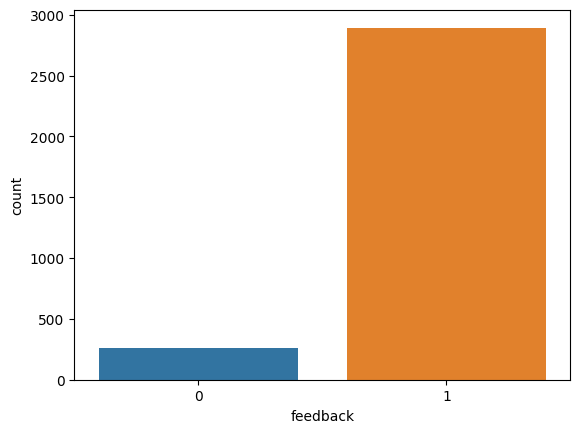

In [6]:
# check for balance
sns.countplot(x='feedback', data=original_data)
print(original_data.feedback.value_counts())

# TASK #4: PERFORM DATA CLEANING

In [7]:
# Remove duplicates
original_data.drop_duplicates(inplace=True)

In [8]:
# Assume that "date" and "variation" are not important for our analysis
original_data.drop(["date", "variation"], axis=1, inplace=True)

In [9]:
# Convert datatype
original_data['rating'] = original_data['rating'].astype(int)
original_data['verified_reviews'] = original_data['verified_reviews'].astype(str)
original_data['feedback'] = original_data['feedback'].astype(int)

In [10]:
original_data.head()

,rating,verified_reviews,feedback
0,5,Love my Echo!,1
1,5,Loved it!,1
2,4,"Sometimes while playing a game, you can answer...",1
3,5,I have had a lot of fun with this thing. My 4 ...,1
4,5,Music,1


# TASK #5: LEARN HOW TO REMOVE PUNCTUATION FROM TEXT

In [11]:
# Remove punctuation from the verified_reviews
def remove_punctuation(text: str) -> str:
    import string

    return text.translate(str.maketrans("", "", string.punctuation))

# Test
print(remove_punctuation("Love my Echo!"))
print(remove_punctuation("I , >\. ?lov!e ?my Echo!"))
print(remove_punctuation("Hihi hehe huhu !$( )  + - * /^ @"))

Love my Echo
I   love my Echo
Hihi hehe huhu        


In [12]:
original_data["verified_reviews"] = original_data["verified_reviews"].apply(remove_punctuation)

In [13]:
original_data.head(10)

,rating,verified_reviews,feedback
0,5,Love my Echo,1
1,5,Loved it,1
2,4,Sometimes while playing a game you can answer ...,1
3,5,I have had a lot of fun with this thing My 4 y...,1
4,5,Music,1
5,5,I received the echo as a gift I needed another...,1
6,3,Without having a cellphone I cannot use many o...,1
7,5,I think this is the 5th one Ive purchased Im w...,1
8,5,looks great,1
9,5,Love it I’ve listened to songs I haven’t heard...,1


# TASK 6: UNDERSTAND HOW TO REMOVE STOPWORDS

In [14]:
def remove_stopwords(text: str) -> str:
    import nltk
    from nltk.corpus import stopwords

    nltk.download('stopwords')
    stop_words = stopwords.words('english')

    return " ".join([word for word in text.split() if word not in stop_words])

In [15]:
original_data["verified_reviews"] = original_data["verified_reviews"].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/thinhlpg/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/thinhlpg/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/thinhlpg/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/thinhlpg/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/thinhlpg/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/thinhlpg/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/thinhlpg/nltk_data...
[nltk_data]   Package stopwords is already up-t

In [16]:
original_data.head(10)

,rating,verified_reviews,feedback
0,5,Love Echo,1
1,5,Loved,1
2,4,Sometimes playing game answer question correct...,1
3,5,I lot fun thing My 4 yr old learns dinosaurs c...,1
4,5,Music,1
5,5,I received echo gift I needed another Bluetoot...,1
6,3,Without cellphone I cannot use many features I...,1
7,5,I think 5th one Ive purchased Im working getti...,1
8,5,looks great,1
9,5,Love I’ve listened songs I haven’t heard since...,1


# TASK 7: UNDERSTAND HOW TO PERFORM COUNT VECTORIZATION (TOKENIZATION)

![alt text](https://drive.google.com/uc?id=1eQi-Gq66e-sNw1ZvGs-zkJg95mCYdFoJ)

In [17]:
from sklearn.feature_extraction.text import CountVectorizer


# document = [
#     "One Geek helps Two Geeks",
#     "Two Geeks help Four Geeks",
#     "Each Geek helps many other Geeks at GeeksforGeeks",
# ]

document = original_data["verified_reviews"].values

vectorizer = CountVectorizer()
vectorizer.fit(document)
vector = vectorizer.transform(document)

print("Vocabulary: ", vectorizer.vocabulary_)
print("Vocabulary size: ", vectorizer.vocabulary_.__len__())
# Summarizing the Encoded Texts
print("Encoded Document is:")
print(vector.toarray())
print("Encoded Document shape is:")
print(vector.shape)

Vocabulary:  {'love': 2377, 'echo': 1307, 'loved': 2378, 'sometimes': 3612, 'playing': 2913, 'game': 1679, 'answer': 340, 'question': 3087, 'correctly': 976, 'alexa': 269, 'says': 3368, 'got': 1748, 'wrong': 4415, 'answers': 343, 'like': 2300, 'able': 144, 'turn': 4085, 'lights': 2296, 'away': 461, 'home': 1912, 'lot': 2370, 'fun': 1655, 'thing': 3951, 'my': 2565, 'yr': 4447, 'old': 2698, 'learns': 2265, 'dinosaurs': 1179, 'control': 948, 'play': 2910, 'games': 1680, 'categories': 726, 'has': 1835, 'nice': 2620, 'sound': 3635, 'music': 2552, 'well': 4325, 'received': 3154, 'gift': 1714, 'needed': 2592, 'another': 339, 'bluetooth': 581, 'something': 3610, 'easily': 1303, 'accessible': 155, 'found': 1631, 'smart': 3571, 'speaker': 3662, 'can': 695, 'wait': 4264, 'see': 3416, 'else': 1350, 'without': 4377, 'cellphone': 739, 'cannot': 701, 'use': 4182, 'many': 2430, 'features': 1544, 'ipad': 2116, 'it': 2136, 'is': 2122, 'great': 1770, 'alarm': 259, 'if': 1966, 'almost': 291, 'deaf': 1069,

# TASK #8: PERFORM DATA CLEANING BY APPLYING EVERYTHING WE LEARNED SO FAR!

### In this task, I will redo the data cleaning process, so everything will be in one cell

In [18]:
import pandas as pd


# Read the data
original_data = pd.read_csv("data/amazon_alexa.tsv", delimiter="\t")

# Remove duplicates
original_data.drop_duplicates(inplace=True)

# Assume that "date" and "variation" are not important for our analysis
original_data.drop(["date", "variation"], axis=1, inplace=True)

# Convert datatype
original_data['rating'] = original_data['rating'].astype(int)
original_data['verified_reviews'] = original_data['verified_reviews'].astype(str)
original_data['feedback'] = original_data['feedback'].astype(int)

# Remove punctuation from the verified_reviews
original_data["verified_reviews"] = original_data["verified_reviews"].apply(remove_punctuation)

# Remove stopwords from the verified_reviews
original_data["verified_reviews"] = original_data["verified_reviews"].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/thinhlpg/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/thinhlpg/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/thinhlpg/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/thinhlpg/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/thinhlpg/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/thinhlpg/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/thinhlpg/nltk_data...
[nltk_data]   Package stopwords is already up-t

### The original data is highly imbalanced (more than 90% of sample are labeled 1), so I will perform an additional step of upsampling the data to make it balanced.

In [19]:
from sklearn.utils import resample

# Separate majority and minority classes in training data for upsampling
data_majority = original_data[original_data["feedback"] == 1]
data_minority = original_data[original_data["feedback"] == 0]

print("majority class before upsample:", data_majority.shape)
print("minority class before upsample:", data_minority.shape)

# Upsample minority class
data_minority_upsampled = resample(
    data_minority,
    replace=True,  # sample with replacement
    n_samples=data_majority.shape[0],  # to match majority class
    random_state=123,
)  # reproducible results

# Combine majority class with upsampled minority class
data_upsampled = pd.concat([data_majority, data_minority_upsampled])
# Display new class counts
print("After upsampling\n", data_upsampled.feedback.value_counts(), sep="")

majority class before upsample: (2214, 3)
minority class before upsample: (221, 3)
After upsampling
feedback
1    2214
0    2214
Name: count, dtype: int64


### And finally, I will perform count vectorization on the upsampled data

In [20]:
vector = vectorizer.transform(data_upsampled["verified_reviews"].values)

print("Vocabulary: ", vectorizer.vocabulary_)
print("Vocabulary size: ", vectorizer.vocabulary_.__len__())
# Summarizing the Encoded Texts
print("Encoded Document is:")
print(vector.toarray())
print("Encoded Document shape is:")
print(vector.shape)

Vocabulary:  {'love': 2377, 'echo': 1307, 'loved': 2378, 'sometimes': 3612, 'playing': 2913, 'game': 1679, 'answer': 340, 'question': 3087, 'correctly': 976, 'alexa': 269, 'says': 3368, 'got': 1748, 'wrong': 4415, 'answers': 343, 'like': 2300, 'able': 144, 'turn': 4085, 'lights': 2296, 'away': 461, 'home': 1912, 'lot': 2370, 'fun': 1655, 'thing': 3951, 'my': 2565, 'yr': 4447, 'old': 2698, 'learns': 2265, 'dinosaurs': 1179, 'control': 948, 'play': 2910, 'games': 1680, 'categories': 726, 'has': 1835, 'nice': 2620, 'sound': 3635, 'music': 2552, 'well': 4325, 'received': 3154, 'gift': 1714, 'needed': 2592, 'another': 339, 'bluetooth': 581, 'something': 3610, 'easily': 1303, 'accessible': 155, 'found': 1631, 'smart': 3571, 'speaker': 3662, 'can': 695, 'wait': 4264, 'see': 3416, 'else': 1350, 'without': 4377, 'cellphone': 739, 'cannot': 701, 'use': 4182, 'many': 2430, 'features': 1544, 'ipad': 2116, 'it': 2136, 'is': 2122, 'great': 1770, 'alarm': 259, 'if': 1966, 'almost': 291, 'deaf': 1069,

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Encoded Document shape is:
(4428, 4457)


# TASK #9: UNDERSTAND THE THEORY AND INTUITION BEHIND NAIVE BAYES

![alt text](https://drive.google.com/uc?id=1Xox54bvjhGOhrG-fSxEUIEgw1R3g-RIt)

![alt text](https://drive.google.com/uc?id=18Z4ug4UuyQG79lyPKs1zQwtrP_S4_yoU)

![alt text](https://drive.google.com/uc?id=1sVLtg8GaE3ZhNEZX1WJbxs7KAQyQ5dpX)

![alt text](https://drive.google.com/uc?id=1NT6Fm-lWUWNsu9i8uzVS4Q5pcm5gp8RK)

![alt text](https://drive.google.com/uc?id=1C32q5Uguymr9012x1lzRD5btnvJ-kW9r)

![alt text](https://drive.google.com/uc?id=1g5aXo5E-RIjRBy6-LLLA8gjG2j9dIL5X)

![alt text](https://drive.google.com/uc?id=106OXP_z89Hqh1JYVaROIbst0N0CgFRuT)

![alt text](https://drive.google.com/uc?id=1AXTHZ9KVUsJjMm9Whc4Adi5T4OznsSYn)

# TASK #10: TRAIN A NAIVE BAYES CLASSIFIER MODEL

In [22]:
# Train a Naive Bayes model - train with the upsampled data
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

X = vector
y = data_upsampled["feedback"].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Multinomial Naive Bayes model
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train, y_train)

MultinomialNB()

# TASK #11: ASSESS TRAINED MODEL PERFORMANCE

![alt text](https://drive.google.com/uc?id=14_ft6Wiu-VaiU_5Ew2nS7EGGr3oLLQf8)

In [27]:
# Predict on the test set
y_pred = naive_bayes_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)

print("Performance on the test set")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

# Confusion matrix
print("Confusion Matrix: ")
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

Performance on the test set
Accuracy: 0.9480812641083521
Precision: 0.971830985915493
Recall: 0.9241071428571429
F1 Score: 0.9473684210526317
Confusion Matrix: 
[[426  12]
 [ 34 414]]


# TASK #12: ASSIGNMENT - TRAIN AND EVALUATE A LOGISTIC REGRESSION CLASSIFIER

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)

# Predict on the test set
y_pred = logistic_regression_model.predict(X_test)

# Evaluate the model's performance
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)


# Confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ")
print(cm)

Accuracy: 0.9401805869074492
Precision: 0.9540229885057471
Recall: 0.9263392857142857
F1 Score: 0.9399773499433748
Confusion Matrix: 
[[418  20]
 [ 33 415]]


# EXCELLENT JOB! YOU SHOULD BE PROUD OF YOUR NEWLY ACQUIRED SKILLS